In [1]:
from bs4 import BeautifulSoup
import requests, pandas as pd
import re
from tqdm import tqdm


In [85]:
# web_url에 원하는 웹의 URL을 넣어주시면 됩니다.
r = requests.get("http://www.gsshop.com/prd/prd.gs?prdid=29919256")
print(r.status_code)
print(r.headers['content-type'])
# r.encoding
# r.text


200
text/html;charset=UTF-8


In [94]:
soup = BeautifulSoup(r.text, 'html.parser')


title = soup.find('p', {'class' : 'product-title'}).text

# id=ex_id인 div 태그를 가져와서 # 그 태그들 안에서 p 태그를 가져온다.
div_sales = soup.find("div", {"class":"product-feature-bar_column-right"})
num_sales = div_sales.find("strong",{"id":"ordQtyText"}).text
num_sales = "".join(re.findall('\d',num_sales))

# id=ex_id인 div 태그를 가져와서
a_review = soup.find("a", {"class":"customer-reviews-link-count"})
num_review = a_review.find("em").text
num_review = "".join(re.findall('\d',num_review)) 

# id=ex_id인 div 태그를 가져와서
span_discnt = soup.find("span", {"class":"price-definition-percent"})
num_discnt = span_discnt.find("em").text

# a = dict('title'=title,'num_sales'=num_sales,'num_review'=num_review,'num_discnt'=num_discnt)
a = dict(title=title,num_sales=num_sales,num_review=num_review,num_discnt=num_discnt)
print(a)

{'title': '[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8', 'num_sales': '1628', 'num_review': '156', 'num_discnt': '12'}


In [95]:
def crawler(weburl,lists):
    r = requests.get(weburl)
    soup = BeautifulSoup(r.text, 'html.parser')
    #title
    title = soup.find('p', {'class' : 'product-title'}).text
    
    try:# qty
        div_sales = soup.find("div", {"class":"product-feature-bar_column-right"})
        num_sales = div_sales.find("strong",{"id":"ordQtyText"}).text
        num_sales = "".join(re.findall('\d',num_sales))
    except:
        num_sales=-1
        
    
    try:# reviews
        a_review = soup.find("a", {"class":"customer-reviews-link-count"})
        num_review = a_review.find("em").text
        num_review = "".join(re.findall('\d',num_review))
    except:
        num_review=0
        
    try: #discnt_pct
        span_discnt = soup.find("span", {"class":"price-definition-percent"})
        num_discnt = span_discnt.find("em").text
    except:
        num_discnt =0
        
    lists.append(dict(title=title,num_sales=num_sales,num_review=num_review,num_discnt=num_discnt,URL=weburl[7:]))
    

In [159]:
data = pd.read_pickle('청소기.pk')

In [160]:
print(data.shape)
data.head(1)

(154, 2)


,SOURCE,URL
0,전체-인기순,www.gsshop.com/prd/prd.gs?prdid=32376489


In [161]:
temp = []
for index, value in tqdm(data.iterrows()):
    try:
        crawler(str('http://'+value.URL),temp)
    except:
        print(index, value)
yap2 = pd.DataFrame(temp)

154it [01:33,  1.65it/s]


In [184]:
result = pd.merge(yap2,data,how='left',on='URL')
yap2.num_sales=result['num_sales'].astype(int)
yap2.num_review=result['num_review'].astype(int)
yap2.sort_values(by=['num_sales','num_review'],ascending=False).to_pickle('청소기_crawl.pk')
yap2[yap2['num_sales']>10000].nlargest(10, 'num_review').to_pickle('cb1.pk')

In [114]:
yap.head(1)

,URL,num_discnt,num_review,num_sales,title
0,www.gsshop.com/prd/prd.gs?prdid=29919256,12,156,1628,[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8


In [115]:
result = pd.merge(yap,data,how='left',on='URL')
print(result.shape)
result.head(1)

(117, 6)


,URL,num_discnt,num_review,num_sales,title,SOURCE
0,www.gsshop.com/prd/prd.gs?prdid=29919256,12,156,1628,[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8,전체-인기순


In [117]:
# result['num_discnt']=result['num_discnt'].astype(int)
# result.num_review=result['num_review'].astype(int)
yap.num_sales=result['num_sales'].astype(int)
yap.sort_values(by=['num_sales','num_review'],ascending=False)#.to_pickle('냉장고_crawl.pk')

,URL,num_discnt,num_review,num_sales,title
1,www.gsshop.com/prd/prd.gs?prdid=31158094,9,50,1628,[TV쇼핑]LG DIOS 냉장고 S831SS35 실버 매직스페이스 821L + 코코...
63,www.gsshop.com/prd/prd.gs?prdid=31630302,7,19,1628,[TV쇼핑]딤채 김치냉장고 221L 뚜껑형 어반실버 LDL22BEMUSF + 홈세트...
0,www.gsshop.com/prd/prd.gs?prdid=29919256,12,156,1628,[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8
64,www.gsshop.com/prd/prd.gs?prdid=32373593,5,0,1628,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + L...
5,www.gsshop.com/prd/prd.gs?prdid=32370777,5,0,940,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + 주...
4,www.gsshop.com/prd/prd.gs?prdid=32370484,8,3,836,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...
16,www.gsshop.com/prd/prd.gs?prdid=31155331,0,25,757,LG 디오스 매직스페이스 냉장고 F871SS32 (870L)
3,www.gsshop.com/prd/prd.gs?prdid=32172882,7,69,731,[TV쇼핑]LG DIOS 냉장고 F871S30H 실버 매직스페이스 5도어 866L ...
2,www.gsshop.com/prd/prd.gs?prdid=31161035,9,48,731,[TV쇼핑]LG DIOS 냉장고 S831S32 메탈 821L + 코코젤리 블렌더 사은품
65,www.gsshop.com/prd/prd.gs?prdid=32373541,5,1,731,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + L...


In [181]:
yap.nlargest(10, 'num_sales')

,URL,num_discnt,num_review,num_sales,title
0,www.gsshop.com/prd/prd.gs?prdid=29919256,9,0,1628.0,[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8
1,www.gsshop.com/prd/prd.gs?prdid=31158094,9,0,1628.0,[TV쇼핑]LG DIOS 냉장고 S831SS35 실버 매직스페이스 821L + 코코...
63,www.gsshop.com/prd/prd.gs?prdid=31630302,0,152,1628.0,[TV쇼핑]딤채 김치냉장고 221L 뚜껑형 어반실버 LDL22BEMUSF + 홈세트...
64,www.gsshop.com/prd/prd.gs?prdid=32373593,0,103,1628.0,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + L...
5,www.gsshop.com/prd/prd.gs?prdid=32370777,10,0,940.0,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + 주...
4,www.gsshop.com/prd/prd.gs?prdid=32370484,10,0,836.0,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...
16,www.gsshop.com/prd/prd.gs?prdid=31155331,0,8283,757.0,LG 디오스 매직스페이스 냉장고 F871SS32 (870L)
2,www.gsshop.com/prd/prd.gs?prdid=31161035,9,0,731.0,[TV쇼핑]LG DIOS 냉장고 S831S32 메탈 821L + 코코젤리 블렌더 사은품
3,www.gsshop.com/prd/prd.gs?prdid=32172882,9,0,731.0,[TV쇼핑]LG DIOS 냉장고 F871S30H 실버 매직스페이스 5도어 866L ...
65,www.gsshop.com/prd/prd.gs?prdid=32373541,0,78,731.0,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + L...


In [182]:
yap.num_review=result['num_review'].astype(int)
yap.nlargest(10, 'num_review')

,URL,num_discnt,num_review,num_sales,title
13,www.gsshop.com/prd/prd.gs?prdid=31746000,9,10892,-1.0,[TV쇼핑]LG DIOS 냉장고 F871S30H 실버 매직스페이스 5도어 866L ...
14,www.gsshop.com/prd/prd.gs?prdid=32377219,9,10892,-1.0,[TV쇼핑]삼성 지펠 냉장고 T9000 4도어 856L RF85N9003G1/RF8...
15,www.gsshop.com/prd/prd.gs?prdid=27128363,9,10892,-1.0,LG 디오스 뚜껑식 김치냉장고 K227AW11E (219L)
8,www.gsshop.com/prd/prd.gs?prdid=32377079,5,8886,97.0,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...
9,www.gsshop.com/prd/prd.gs?prdid=32370504,5,8886,-1.0,[TV쇼핑]삼성 지펠 냉장고 T9000 4도어 856L RF85N9003G1/RF8...
10,www.gsshop.com/prd/prd.gs?prdid=31016774,5,8886,276.0,LG 디오스 매직스페이스 냉장고 S831W32 (821L)
11,www.gsshop.com/prd/prd.gs?prdid=27519256,5,8886,132.0,LG 디오스 스탠드형 김치냉장고 K417SW11
12,www.gsshop.com/prd/prd.gs?prdid=30667819,7,8886,52.0,LG 일반냉장고 B477WM (480ℓ)
16,www.gsshop.com/prd/prd.gs?prdid=31155331,0,8283,757.0,LG 디오스 매직스페이스 냉장고 F871SS32 (870L)
49,www.gsshop.com/prd/prd.gs?prdid=31708008,0,2547,-1.0,위니아 딤채 18년형 김치냉장고 EDL20AXMAGS/뚜껑형(200리터/2룸


In [179]:
yap.num_discnt=result['num_discnt'].astype(int)
yap.nlargest(2, 'num_discnt')

,URL,num_discnt,num_review,num_sales,title
44,www.gsshop.com/prd/prd.gs?prdid=31980711,11,140,57.0,대우전자 클라쎄 144L 실속형 소형냉장고 FR-B151SDWK
4,www.gsshop.com/prd/prd.gs?prdid=32370484,10,0,836.0,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...


In [187]:
yap.nsmallest(10,'num_sales')

,URL,num_discnt,num_review,num_sales,title
9,www.gsshop.com/prd/prd.gs?prdid=32370504,5,8886,-1.0,[TV쇼핑]삼성 지펠 냉장고 T9000 4도어 856L RF85N9003G1/RF8...
13,www.gsshop.com/prd/prd.gs?prdid=31746000,9,10892,-1.0,[TV쇼핑]LG DIOS 냉장고 F871S30H 실버 매직스페이스 5도어 866L ...
14,www.gsshop.com/prd/prd.gs?prdid=32377219,9,10892,-1.0,[TV쇼핑]삼성 지펠 냉장고 T9000 4도어 856L RF85N9003G1/RF8...
15,www.gsshop.com/prd/prd.gs?prdid=27128363,9,10892,-1.0,LG 디오스 뚜껑식 김치냉장고 K227AW11E (219L)
18,www.gsshop.com/prd/prd.gs?prdid=27803631,0,1583,-1.0,위니아 딤채 18년형 김치냉장고 쁘띠 WDS10BPACR (100리터)
19,www.gsshop.com/prd/prd.gs?prdid=27775689,0,1583,-1.0,위니아 딤채 18년형 김치냉장고 EDQ57BFRMT/스탠드형(551리터/4룸)
20,www.gsshop.com/prd/prd.gs?prdid=31158090,9,1583,-1.0,[TV쇼핑]LG DIOS 냉장고 F871S30H 실버 매직스페이스 5도어 866L ...
21,www.gsshop.com/prd/prd.gs?prdid=32414994,9,1583,-1.0,LG 컨버터블 패키지 냉동고 A328S [2주배송지연]
22,www.gsshop.com/prd/prd.gs?prdid=30373980,9,1583,-1.0,[TV쇼핑]LG 디오스 냉장고 F871NS73 노크온 매직스페이스 + LG코드제로 ...
24,www.gsshop.com/prd/prd.gs?prdid=32370325,0,263,-1.0,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...


In [191]:
# yap[(yap['num_sales']>=300)&(yap['num_review']>=50)].nlargest(20,'num_discnt')
yo = yap.nlargest(7,'num_sales')
# yo=yo.append(yap.nlargest(1, 'num_review'))
# yo = yap[(yap['num_sales']>=500)&((yap['num_review']>50))]
yo=yo.append(yap.nlargest(3, 'num_review'))
yo.to_pickle('cb_냉장고.pk')


In [189]:
yap[(yap['num_sales']>=500)]
yap.nlargest(7,'num_sales')

,URL,num_discnt,num_review,num_sales,title
0,www.gsshop.com/prd/prd.gs?prdid=29919256,9,0,1628.0,[TV쇼핑]삼성 지펠 냉장고 유러피안 양문형 815L RS82M6000S8
1,www.gsshop.com/prd/prd.gs?prdid=31158094,9,0,1628.0,[TV쇼핑]LG DIOS 냉장고 S831SS35 실버 매직스페이스 821L + 코코...
63,www.gsshop.com/prd/prd.gs?prdid=31630302,0,152,1628.0,[TV쇼핑]딤채 김치냉장고 221L 뚜껑형 어반실버 LDL22BEMUSF + 홈세트...
64,www.gsshop.com/prd/prd.gs?prdid=32373593,0,103,1628.0,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + L...
5,www.gsshop.com/prd/prd.gs?prdid=32370777,10,0,940.0,[TV쇼핑]LG DIOS 냉장고 F841SN35 김치톡톡 프리스타일 836L + 주...
4,www.gsshop.com/prd/prd.gs?prdid=32370484,10,0,836.0,[TV쇼핑]삼성 지펠 냉장고 T9000 5도어 푸드쇼케이스 848L RF85N920...
16,www.gsshop.com/prd/prd.gs?prdid=31155331,0,8283,757.0,LG 디오스 매직스페이스 냉장고 F871SS32 (870L)


TypeError: float() argument must be a string or a number, not 'function'

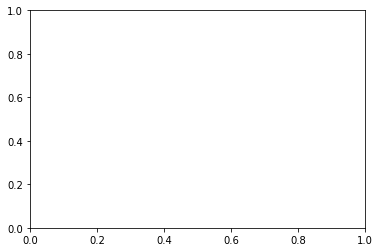

In [158]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# num_sales 와 num_review의 관계

# Fixing random state for reproducibility

yap['num_sales']=yap['num_sales'].astype(float)
yap['num_review']=yap['num_review'].astype(float)
x = yap['num_sales'].values
y = yap['num_review'].values

# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
#s=area, 
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

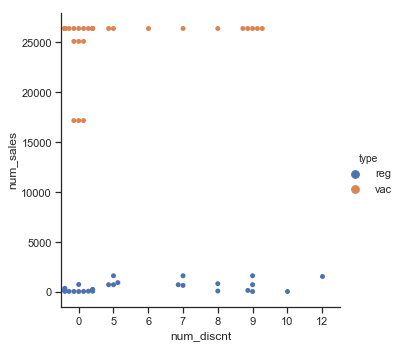

In [16]:
import seaborn as sns, pandas as pd
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
#source별로 보기
# tips = sns.load_dataset("tips")
result1 = pd.read_pickle('cb_냉장고')
result1['type'] = 'reg'
result2 = pd.read_pickle('cb_청소기')
result2['type'] = 'vac'
result = pd.concat([result1,result2])
result.num_discnt = result.num_discnt.astype(int)
result.num_review = result.num_review.astype(int)
sns.catplot(x="num_discnt", y="num_sales", kind ='swarm',hue='type',data=result);#,hue="SOURCE"



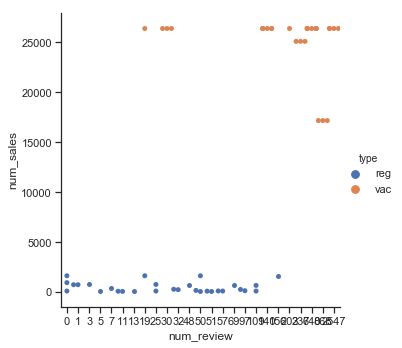

In [17]:
sns.catplot(x="num_review", y="num_sales", kind ='swarm',hue='type',data=result);#,hue="SOURCE"


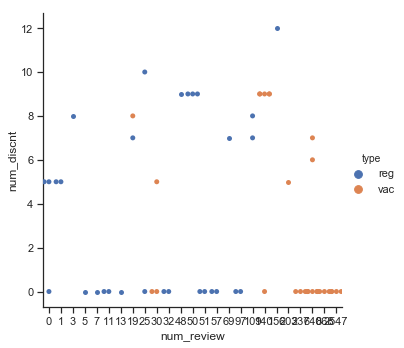

In [18]:
sns.catplot(x="num_review", y="num_discnt", kind ='swarm',hue='type',data=result);#,hue="SOURCE"

In [20]:
sns.catplot(x="num_review", y="num_sales", kind ='swarm',size='num_discnt',data=result);#,hue="SOURCE"

c:\python36\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# 각 컬럼 기준으로 barchart그리기